# Explore the Copenhagen Diplomatarium dataset (Københavns Diplomatarium)

In [ ]:
import pandas as pd
import re
import nltk
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from nltk.text import Text
import matplotlib.pyplot as plt
# Ensure the required NLTK resources are downloaded
nltk.download('punkt')  # Optional if you haven't already downloaded

In [5]:
df = pd.read_csv('kd_std.csv')

In [6]:
df.columns

Index(['volume', 'page', 'number', 'date', 'year_std', 'month_std', 'day_std',
       'date_std', 'summary', 'note', 'main_content', 'file_name'],
      dtype='object')

In [7]:
# Time period  
print (f"The oldest source is from: {df['year_std'].min()}")
print (f"The most recent source is from: {df['year_std'].max()}")

The oldest source is from: 1177.0
The most recent source is from: 1728.0


In [8]:
year_count = df['year_std'].value_counts()\
                            .to_frame()\
                            .head(10)\
                            .reset_index()


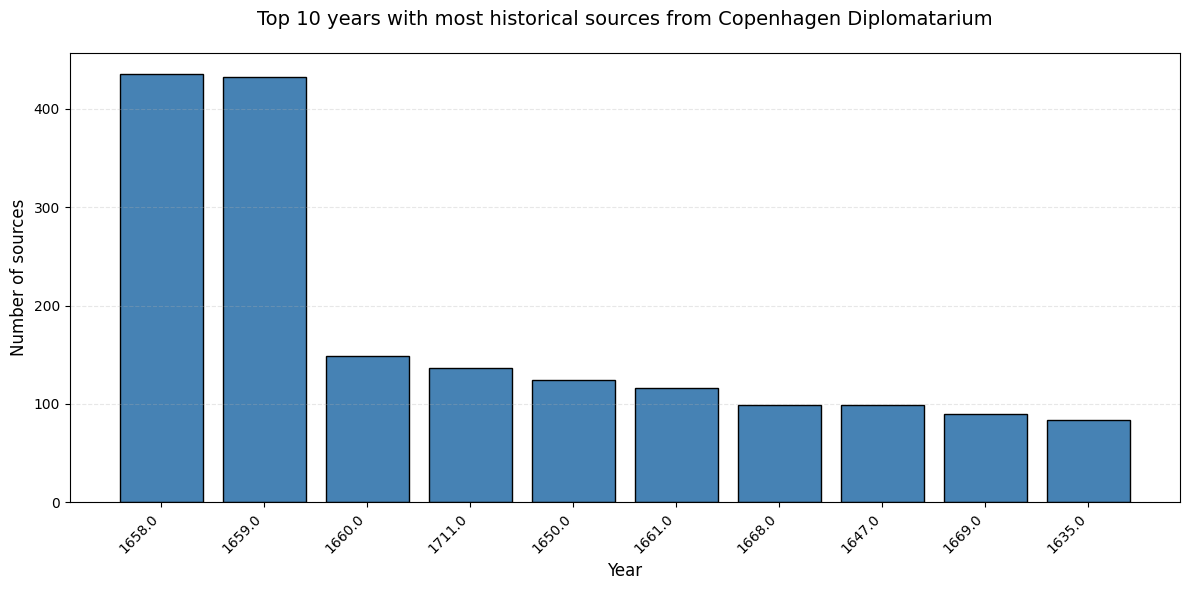

In [9]:
# Bar plot of the 10 most frequent years
plt.figure(figsize=(12, 6))
plt.bar(year_count['year_std'].astype(str), year_count['count'], color='steelblue', edgecolor='black')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of sources', fontsize=12)
plt.title('Top 10 years with most historical sources from Copenhagen Diplomatarium', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


In [10]:
whole_1658 = ' '.join(df[df['year_std']==1658]['main_content'].to_list()).lower()
_clean_whole_1658 = ' '.join(re.findall(r'\b\S+\b', whole_1658))
_clean_whole_1658 = re.sub(r'\d+',' ', _clean_whole_1658)
_clean_whole_1658 = re.sub(r'\s+',' ', _clean_whole_1658)
_clean_whole_1658_wordlist = _clean_whole_1658.split()
with open('kd_stopwords.txt', 'r', encoding='utf-8') as f:
    stopword_list = f.read().split('\n')

clean_whole_1658_wordlist_wo_stopwords = [i for i in _clean_whole_1658_wordlist if i not in stopword_list]

freq_dist_1658 = FreqDist(clean_whole_1658_wordlist_wo_stopwords)

# Optional: To see the most common words
print(freq_dist_1658.most_common(20))

[('hafniæ', 462), ('gunst', 385), ('bede', 321), ('naadigst', 295), ('raad', 196), ('kiøbenhafn', 159), ('borgemestere', 155), ('staden', 146), ('elskelig', 143), ('augusti', 121), ('anordning', 117), ('synderlig', 97), ('byen', 95), ('christianshafn', 95), ('kiøbsted', 91), ('septembris', 82), ('octobris', 77), ('naadigste', 65), ('officerer', 62), ('penge', 62)]


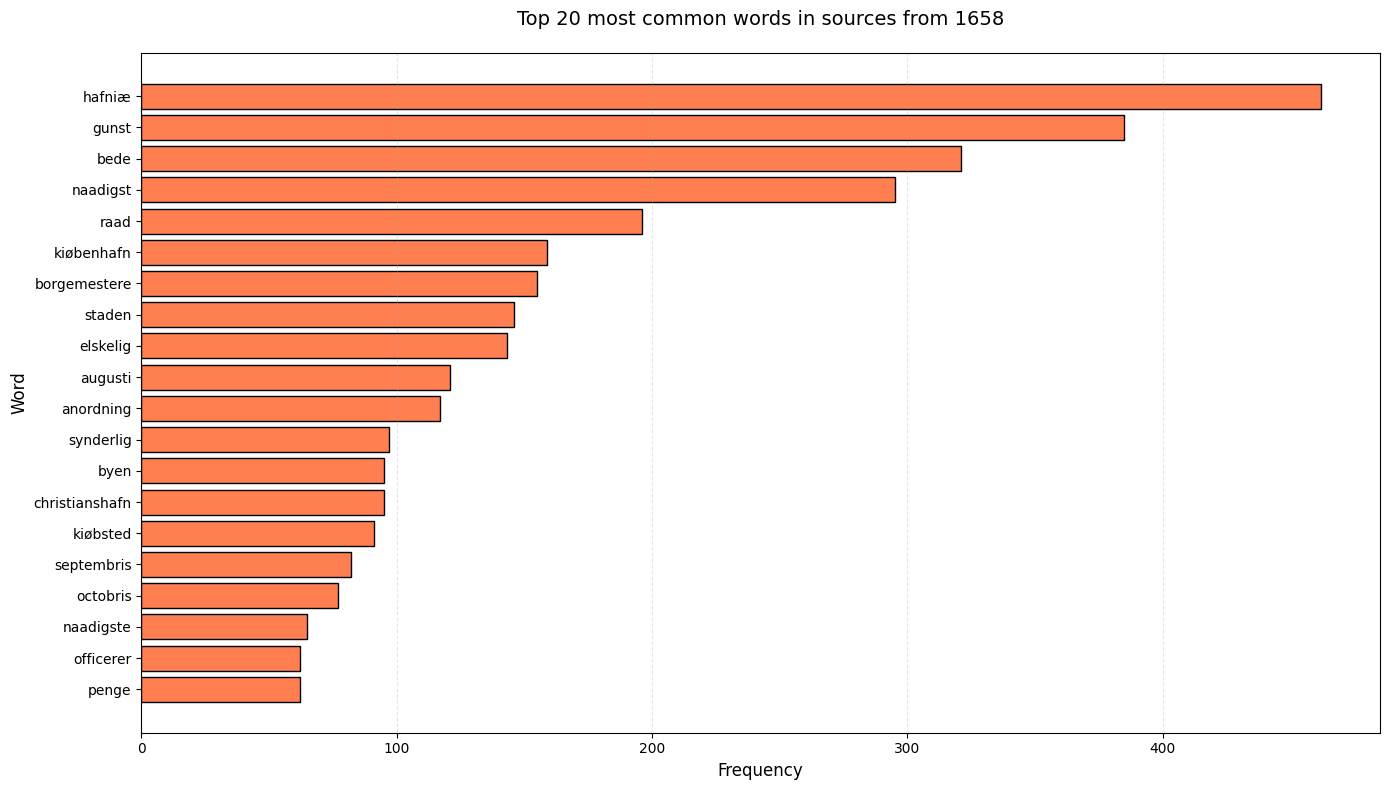

In [11]:
# Visualization of common words from the year 1658
top_words = freq_dist_1658.most_common(20)
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

plt.figure(figsize=(14, 8))
plt.barh(words, frequencies, color='coral', edgecolor='black')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.title('Top 20 most common words in sources from 1658', fontsize=14, pad=20)
plt.gca().invert_yaxis()  # Most frequent words at top
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


In [12]:
# NLTK collocation tool 
whole_text_corpus = ' '.join(df['main_content'].astype(str))

# Clean the text
_clean_corpus = ' '.join(re.findall(r'\b\S+\b', whole_text_corpus))
_clean_corpus = re.sub(r'\d+', ' ', _clean_corpus)
clean_corpus = re.sub(r'\s+', ' ', _clean_corpus)

# Tokenize
tokens_clean = clean_corpus.split()

# Remove stopwords
with open('kd_stopwords.txt', 'r', encoding='utf-8') as f:
    stopword_list = f.read().split('\n')

# Find bigram collocations (2-word phrases)
bigram_finder = BigramCollocationFinder.from_words(tokens_clean)
bigram_finder.apply_freq_filter(3)  # Minimum 3 occurrences

print("=" * 60)
print("TOP 20 BIGRAM COLLOCATIONS (2-word phrases)")
print("=" * 60)
bigram_measures = BigramAssocMeasures()
top_bigrams = bigram_finder.nbest(bigram_measures.pmi, 20)  # PMI = Pointwise Mutual Information
for i, (word1, word2) in enumerate(top_bigrams, 1):
    freq = bigram_finder.ngram_fd[(word1, word2)]
    print(f"{i:2d}. '{word1} {word2}' (frequency: {freq})")

print("\n" + "=" * 60)
print("TOP 20 TRIGRAM COLLOCATIONS (3-word phrases)")
print("=" * 60)
# Find trigram collocations (3-word phrases)
trigram_finder = TrigramCollocationFinder.from_words(tokens_clean)
trigram_finder.apply_freq_filter(2)  # Minimum 2 occurrences

trigram_measures = TrigramAssocMeasures()
top_trigrams = trigram_finder.nbest(trigram_measures.pmi, 20)
for i, (word1, word2, word3) in enumerate(top_trigrams, 1):
    freq = trigram_finder.ngram_fd[(word1, word2, word3)]
    print(f"{i:2d}. '{word1} {word2} {word3}' (frequency: {freq})")

TOP 20 BIGRAM COLLOCATIONS (2-word phrases)
 1. 'Blandt Betingelserne' (frequency: 3)
 2. 'Botulphus Awæsson' (frequency: 3)
 3. 'Clementt Thettert' (frequency: 3)
 4. 'Ludolph Ringelman' (frequency: 3)
 5. 'Swers trommetters' (frequency: 3)
 6. 'Wigislef Walbu' (frequency: 3)
 7. 'Wilhelmus Toppius' (frequency: 3)
 8. 'mandtallers forfatning' (frequency: 3)
 9. 'ponerentur nutrirentur' (frequency: 3)
10. 'quintis feriis' (frequency: 3)
11. 'silentium imponendo' (frequency: 3)
12. 'udregninger mandtallers' (frequency: 3)
13. 'validius opitulantibus' (frequency: 3)
14. 'vasallis bondonibus' (frequency: 3)
15. 'Cice Oleffs' (frequency: 3)
16. 'Ciitzæ Tidickes' (frequency: 4)
17. 'Floritz Reinholtsen' (frequency: 3)
18. 'Gertridh Brandz' (frequency: 3)
19. 'Gotlob Skøn' (frequency: 3)
20. 'Hille Grauestens' (frequency: 3)

TOP 20 TRIGRAM COLLOCATIONS (3-word phrases)
 1. 'Cameracensi Tornacensi Morinensi' (frequency: 2)
 2. 'Coloniensi Treuerensi Saltzburgensi' (frequency: 2)
 3. 'Limfior

In [13]:
# NLTK Concordance tool - show all contexts for "christianshafn"

# Create full text corpus
whole_corpus = ' '.join(df['main_content'].astype(str).tolist()).lower()

# Light cleaning - keep punctuation for better context
clean_corpus_conc = re.sub(r'\s+', ' ', whole_corpus)

# Tokenize (split into words)
tokens = nltk.word_tokenize(clean_corpus_conc)

# Create NLTK Text object
text = nltk.Text(tokens)

print("=" * 80)
print("CONCORDANCE FOR 'christianshafn' - Shows context around each occurrence")
print("=" * 80)
print()

# Display concordance - set width and lines
text.concordance('christianshafn', width=70, lines=20)

print("\n" + "=" * 80)
print("STATISTICS")
print("=" * 80)
christianshafn_count = tokens.count('christianshafn')
print(f"Total number of occurrences of 'christianshafn': {christianshafn_count}")
print(f"Total number of tokens in corpus: {len(tokens):,}")
print(f"Frequency: {christianshafn_count/len(tokens)*100:.4f}%")

CONCORDANCE FOR 'christianshafn' - Shows context around each occurrence

Displaying 20 of 742 matches:
ppe , møller oc brygger paa christianshafn , en weyermølle , bebois af
 qv . tyck . herforuden ved christianshafn . 1. svend nielsen møller e
rin en platz i wor kiøbsted christianshafn och madtz pedersen nu sig i
børsen eller i wor kiøbstad christianshafn varene imod recessenn opleg
ster oc raad i vor kiøbsted christianshafn , at deris encher effter de
 , indvaaner i vor kiøbsted christianshafn , oc hans arfvinger en wor 
660. borgemestere oc raad i christianshafn fich bref paa steen i st. a
ll mestere eller dennem udi christianshafn , uden gammell øster port e
tte nærværende stabels stad christianshafn . haffniæ 20 februarii 1667
. til borgemester oc raad i christianshafn . f. 3. effterson jan dysse
som hand udi en kielder paa christianshafn hafuer ladet indlegge , dog
rgemester hans sørensen paa christianshafn sig nogen irring oc tuistig
. til borgemester oc raad i christianshafn . 